# A Snapshot Model for Country-Level Fertility

### Suzanna Buck 

In [405]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, cross_validation, neighbors, svm
from sklearn.preprocessing import Imputer
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [416]:
df = pd.read_csv('../../Users/icelands0/DSData.csv')

In [417]:
df.head()

,GDP_adj,marriage_age,workingpop,unemploy,urbanpop,urbanpop_growth,age,school_years,internet,IMR,HDI,cellphones,female_workingpop,fertility,child_mort
0,748.112813,17.83968,59.000000,8.5,21.882,NaN,16.490,0.6,1.130398,84.4,0.340,4.345509,29.200001,6.93,119.6
1,6101.576850,23.32651,60.400002,12.5,46.804,3.294365,28.532,10.3,6.043891,18.3,0.721,48.705965,55.599998,1.92,20.5
2,7168.564540,29.60000,56.599998,15.3,66.689,2.300978,24.015,6.5,5.843942,28.8,0.667,41.538459,36.200001,2.51,33.6
3,3354.650960,NaN,81.500000,6.8,53.943,NaN,16.718,4.0,1.143367,121.2,0.445,9.770853,75.500000,6.66,203.9
4,10833.405600,23.26396,61.900002,10.6,91.382,-0.041017,29.120,11.1,17.720583,15.3,0.765,57.279611,56.200001,2.29,17.1


In [363]:
df.describe()

,GDP_adj,marriage_age,workingpop,unemploy,urbanpop,urbanpop_growth,age,school_years,internet,IMR,HDI,cellphones,female_workingpop,fertility,child_mort
count,170.000000,175.000000,181.000000,167.000000,177.000000,147.000000,184.000000,164.000000,174.000000,172.000000,165.000000,176.000000,180.000000,184.000000,184.000000
mean,12225.928290,24.528110,63.567956,8.792216,55.705927,2.346863,27.031326,8.521341,19.876545,32.865698,0.639079,45.008668,56.555000,3.001902,45.338043
std,14303.453121,3.774072,9.324285,6.349575,23.953436,2.083553,8.014944,3.560171,22.890820,29.598027,0.180847,36.716318,15.960833,1.605466,47.560664
min,276.993508,17.600200,40.900002,0.600000,9.375000,-0.602623,15.301000,0.600000,0.065239,2.300000,0.260000,0.277843,14.500000,0.850000,2.900000
25%,2090.780265,21.798220,58.400002,4.600000,35.290000,0.906717,19.494500,5.575000,3.000388,8.400000,0.484000,10.958047,47.325000,1.770000,9.800000
50%,6317.355570,23.565310,62.799999,7.300000,57.320000,1.970683,25.465500,9.300000,9.370418,20.850000,0.671000,38.407691,58.650000,2.495000,23.200000
75%,17717.267550,27.352575,69.099998,10.750000,73.581000,3.314655,35.351500,11.600000,30.625688,53.650000,0.784000,75.893164,67.325003,3.895000,70.550000
max,69512.331400,33.269540,90.000000,37.299999,100.000000,14.035765,43.107000,14.400000,87.002639,128.100000,0.938000,127.452230,90.400002,7.620000,203.900000


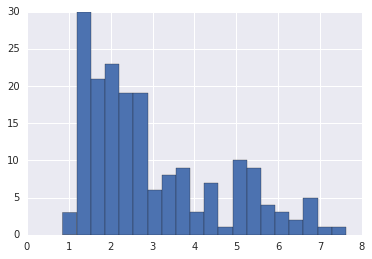

In [364]:
df['fertility'].hist(bins=20)

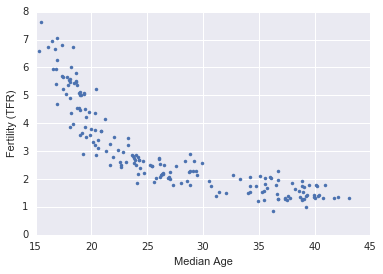

In [365]:
plt.figure()

plt.plot(df.age, df.fertility, '.')
plt.ylabel('Fertility (TFR)')
plt.xlabel('Median Age')

plt.show()

In [366]:
#The relationship between age and fertility looks logarithmic. This may affect the 
#linear regression.

log_columns = ['age', 'fertility',]
log_df = df.copy()
log_df[log_columns] = log_df[log_columns].apply(np.log10)

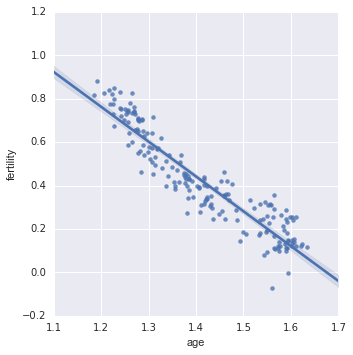

In [367]:
sns.lmplot('age', 'fertility', log_df)

### Single Regression Analysis

In [368]:
import statsmodels.formula.api as smf

X = df[['age']]
y = df['fertility']

lm = smf.ols(formula='y ~ X', data=df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     436.1
Date:                Mon, 13 Jun 2016   Prob (F-statistic):           4.33e-50
Time:                        12:47:55   Log-Likelihood:                -233.37
No. Observations:                 183   AIC:                             470.7
Df Residuals:                     181   BIC:                             477.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.5458      0.226     33.325      0.000         7.099     7.993
X             -0.1678      0.008    -20.884      0.000        -0.184    -0.152
==============================================================================
Omnibus:                        8.369   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.811
Skew:                           0.533   Prob(JB):                       0.0122
Kurtosis:                       2.856   Cond. No.                         99.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

These results suggest the median age of the population alone is not a good predictor of fertility, though there is a relationship between the indicators.

### Multiple Regression Analysis

In [369]:
import statsmodels.formula.api as smf

X = df[['GDP_adj']]
y = df['fertility']
a = df [['marriage_age']]
b = df [['workingpop']]
c = df [['unemploy']]
d = df [['urbanpop']]
e = df [['urbanpop_growth']]
f = df [['age']]
g = df [['school_years']]
h = df [['IMR']]
i = df [['HDI']]
j = df [['cellphones']]
k = df [['female_workingpop']]
l = df [['child_mort']]



lm = smf.ols(formula='y ~ X + a + b + c + d + e + f + g + h + i + j + k + l', data=df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     110.8
Date:                Mon, 13 Jun 2016   Prob (F-statistic):           2.49e-54
Time:                        12:47:58   Log-Likelihood:                -65.024
No. Observations:                 117   AIC:                             158.0
Df Residuals:                     103   BIC:                             196.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.3653      0.962      5.576      0.000         3.457     7.274
X           5.248e-06   5.76e-06      0.910      0.365     -6.18e-06  1.67e-05
a              0.0444      0.021      2.094      0.039         0.002     0.087
b          -8.207e-05      0.009     -0.010      0.992        -0.017     0.017
c             -0.0106      0.007     -1.482      0.141        -0.025     0.004
d              0.0058      0.003      1.781      0.078        -0.001     0.012
e             -0.0334      0.022     -1.505      0.135        -0.077     0.011
f             -0.1006      0.013     -7.699      0.000        -0.126    -0.075
g              0.0196      0.032      0.617      0.539        -0.043     0.083
h             -0.0637      0.010     -6.339      0.000        -0.084    -0.044
i             -2.9902      1.328     -2.252      0.026        -5.623    -0.357
j              0.0019      0.003      0.669      0.505        -0.004     0.008
k              0.0064      0.005      1.366      0.175        -0.003     0.016
l              0.0533      0.006      8.904      0.000         0.041     0.065
==============================================================================
Omnibus:                        1.865   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.479
Skew:                           0.017   Prob(JB):                        0.477
Kurtosis:                       3.550   Cond. No.                     6.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

At the first pass we can see that the employment percentage of the general population and of the female population don't seem to have an effect on fertility and neither does unemployment, but the overall economic indicator of adjusted GDP is relevant.  Urban population and urban growth also are not good indicators, which may have to do with the fact that in many countries with high fertility, they are in the first step of the urbanization cycle, i.e. high rural populations with low employment are moving to urban centers, but have not been their long enough to adopt the urban behavior of fewer offspring. Surprisingly, years in school for women was not significant, though other models have found that to be the most significant factor in how many children a women has. However initial R^2 suggests that explanatory indicators are included in the model.

In [370]:
lm = smf.ols(formula='y ~ X + a + c + d + e + f + h + i + j + k + l', data=df).fit()

print lm.rsquared

0.932788833852


In [371]:
lm = smf.ols(formula='y ~ X + a + c + d + e + f + g + h + i + j + k + l', data=df).fit()

print lm.rsquared

0.93325398495


R-squared is decreasing as even non-significant factors are emlimated, but that's probably just due to the number of factors.  If they were all included the model might be overfit.

In [373]:
lm = smf.ols(formula='y ~ a + c + f + h + i + l', data=df).fit()

print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     224.5
Date:                Mon, 13 Jun 2016   Prob (F-statistic):           1.78e-70
Time:                        12:48:04   Log-Likelihood:                -109.42
No. Observations:                 151   AIC:                             232.8
Df Residuals:                     144   BIC:                             254.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.1768      0.540      9.592      0.0

              marriage_age       age       IMR       HDI  child_mort
marriage_age      1.000000  0.663825 -0.671860  0.782907   -0.640648
age               0.663825  1.000000 -0.764718  0.857841   -0.735084
IMR              -0.671860 -0.764718  1.000000 -0.911020    0.987597
HDI               0.782907  0.857841 -0.911020  1.000000   -0.895896
child_mort       -0.640648 -0.735084  0.987597 -0.895896    1.000000
Axes(0.125,0.125;0.62x0.775)


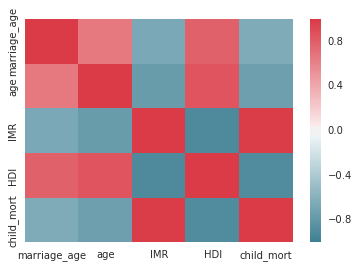

In [374]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df[['marriage_age', 'age', 'IMR', 'HDI', 'child_mort', ]].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

As expected, the infant mortality rate is high collinear with percentage mortality for children under 5. The Human Development Index is a composite of life expectancy, education, and income per capita indicators, so collinearity is also not suprising there. The HDI is also particularly collinear with the infant mortality rate.

              marriage_age       age       HDI  child_mort
marriage_age      1.000000  0.663825  0.782907   -0.640648
age               0.663825  1.000000  0.857841   -0.735084
HDI               0.782907  0.857841  1.000000   -0.895896
child_mort       -0.640648 -0.735084 -0.895896    1.000000
Axes(0.125,0.125;0.62x0.775)


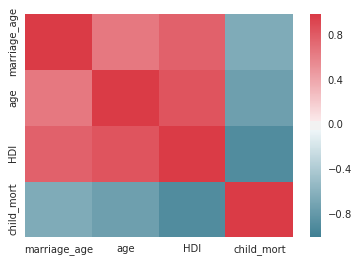

In [253]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df[['marriage_age', 'age', 'HDI', 'child_mort', ]].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

              marriage_age       age       HDI
marriage_age      1.000000  0.663825  0.782907
age               0.663825  1.000000  0.857841
HDI               0.782907  0.857841  1.000000
Axes(0.125,0.125;0.62x0.775)


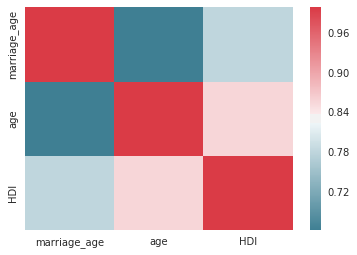

In [254]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df[['marriage_age', 'age', 'HDI',]].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

In [375]:
lm = smf.ols(formula='y ~ a + f + i + l', data=df).fit()

print lm.rsquared

0.858626496766


In [377]:
lm = smf.ols(formula='y ~ a + f + i', data=df).fit()

print lm.rsquared

0.790681845241


In [379]:
lm = smf.ols(formula='y ~ a + f + l', data=df).fit()

print lm.rsquared

0.846318898796


In [380]:
lm = smf.ols(formula='y ~ f + l', data=df).fit()

print lm.rsquared

0.85460811293


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12010e9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fd656d0>]], dtype=object)

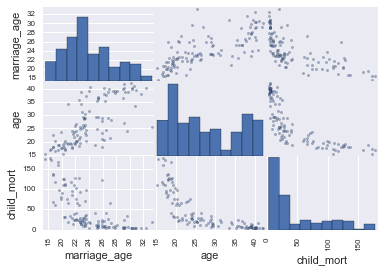

In [340]:
from pandas.tools import plotting
plotting.scatter_matrix(df[['marriage_age', 'age', 'child_mort']]) 

All of these three factors have relationships to one another, either logrithmically or linearly.

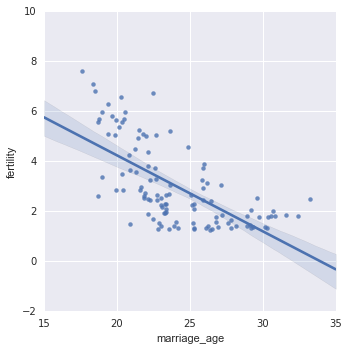

In [342]:
sns.set(color_codes=True)
h = sns.lmplot(x="marriage_age", y="fertility", data=df)

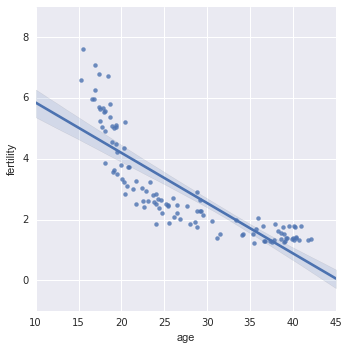

In [349]:
sns.set(color_codes=True)
i = sns.lmplot(x="age", y="fertility", data=df)

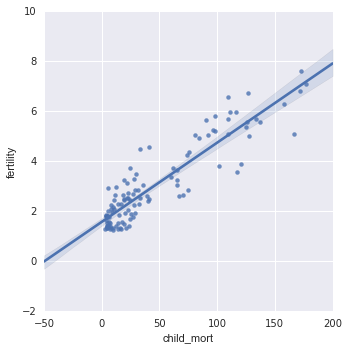

In [344]:
sns.set(color_codes=True)
j = sns.lmplot(x="child_mort", y="fertility", data=df)

In [410]:
df = df.dropna()

In [295]:
def rmse(predicted, targets):
    return (np.sqrt(np.mean((targets-predicted)**2)))

multi_reg_model = linear_model.LinearRegression()
poly_predictors = pd.DataFrame([df["marriage_age"],
                                df["age"],
                                df["child_mort"],
                                df["marriage_age"]**2,
                                df["age"]**2,
                                df["child_mort"]**2]).T

model = multi_reg_model.fit(X = poly_predictors, 
                    y = df["fertility"])
print("R-Squared")
print( multi_reg_model.score(X = poly_predictors , 
                      y = df["fertility"]) )
print("RMSE")
print(rmse(multi_reg_model.predict(poly_predictors),df["fertility"]))

R-Squared
0.925504974612
RMSE
0.446425837747


This R-squared is better than the one for the orginal model using these factors. We could be overfitting, but it's probably not an issue because there are only three factors.

In [350]:
modeldata = df[['marriage_age', 'age', 'child_mort',]]
y = df.fertility 

kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
print np.mean(scores)

lm = linear_model.LinearRegression().fit(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))

0.346025514701
0.319880671338


In [352]:
def rmse(predicted, targets):
    return (np.sqrt(np.mean((targets-predicted)**2)))

multi_reg_model = linear_model.LinearRegression()
poly_predictors = pd.DataFrame([df["age"],
                                df["child_mort"],
                                df["age"]**2,
                                df["child_mort"]**2]).T

model = multi_reg_model.fit(X = poly_predictors, 
                    y = df["fertility"])
print("R-Squared")
print( multi_reg_model.score(X = poly_predictors , 
                      y = df["fertility"]) )
print("RMSE")
print(rmse(multi_reg_model.predict(poly_predictors),df["fertility"]))

R-Squared
0.925361498809
RMSE
0.44685553419


This R-squared is a tiny bit worse but the model is simpler, so it's an improvement.

In [429]:
modeldata = df[['age', 'child_mort',]]
y = df.fertility 

kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
print np.mean(scores)

lm = linear_model.LinearRegression().fit(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))

0.343222864027
0.325329231278


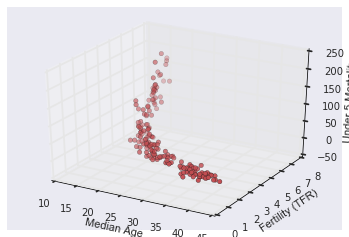

In [381]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['age']
y = df['fertility']
z = df['child_mort']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Median Age')
ax.set_ylabel('Fertility (TFR)')
ax.set_zlabel('Under 5 Mortality')

plt.show()

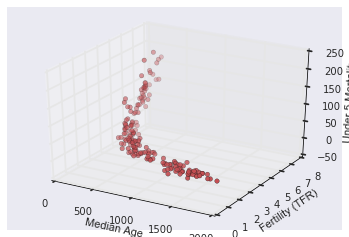

In [385]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['age'] ** 2
y = df['fertility'] 
z = df['child_mort'] 



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Median Age')
ax.set_ylabel('Fertility (TFR)')
ax.set_zlabel('Under 5 Mortality')

plt.show()